# Yugipedia data analysis

## Preamble

### Imports

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

### Lists for query

In [423]:
attributes = ['DIVINE', 'LIGHT', 'DARK', 'WATER', 'EARTH', 'FIRE', 'WIND']
api_url = 'https://yugipedia.com/api.php'
monster_search = '|?English%20name=Name|?Password|?Card%20type|?Primary%20type|?Secondary%20type|?Attribute|?Type=Monster%20type|?Stars%20string=Level%2FRank%20|?ATK%20string=ATK|?DEF%20string=DEF|?Link%20Rating=Link|?Link%20Arrows|?TCG%20status|?OCG%20status|limit%3D5000'
st_search = '|?English%20name=Name|?Password|?Card%20type|?Property|?TCG%20status|?OCG%20status|limit%3D5000'

### Formatting functions

In [80]:
def extract_results(df):
    df = pd.DataFrame(df['query']['results']).transpose()
    df = pd.DataFrame(df['printouts'].values.tolist())
    return df

In [89]:
def format_df(input_df):
    df = pd.DataFrame()
    df['Name'] = input_df['Name'].dropna().apply(lambda x: x[0])
    df['Password'] = input_df['Password'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Card type' in input_df.columns:
        df['Card type'] = input_df['Card type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Property' in input_df.columns:
        df['Property'] = input_df['Property'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Primary type' in input_df.columns:
        df['Primary type'] = input_df['Primary type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Secondary type' in input_df.columns:
        df['Secondary type'] = input_df['Secondary type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Attribute' in input_df.columns:
        df['Attribute'] = input_df['Attribute'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Monster type' in input_df.columns:
        df['Monster type'] = input_df['Monster type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Level/Rank' in input_df.columns:
        df['Level/Rank'] = input_df['Level/Rank'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'ATK' in input_df.columns:
        df['ATK'] = input_df['ATK'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'DEF' in input_df.columns:
        df['DEF'] = input_df['DEF'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Link' in input_df.columns:
        df['Link'] = input_df['Link'].dropna().apply(lambda x: str(x[0]) if len(x)>0 else np.nan)
    if 'Link Arrows' in input_df.columns:
        df['Link Arrows'] = input_df['Link Arrows'].dropna().apply(lambda x: tuple(sorted(x)) if len(x)>0 else np.nan)
    df['TCG status'] = input_df['TCG status'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    df['OCG status'] = input_df['OCG status'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    return df

## Data aquisition

### API call functions

In [424]:
def fetch_spell():
    print('Downloading Spells')
    spell_df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20Spell%20Cards]]{st_search}|order%3Dasc&format=json')
    spell_df = extract_results(spell_df)
    print(f'{len(spell_df.index)} results\n')
    return spell_df

def fetch_trap():
    print('Downloading Traps')
    trap_df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20Trap%20Cards]]{st_search}|order%3Dasc&format=json')
    trap_df = extract_results(trap_df)
    print(f'{len(trap_df.index)} results\n')
    return trap_df

def fetch_monster():
    print('Downloading Monsters')
    monster_df = pd.DataFrame()
    for i in attributes:
        print(f"- {i}")
        df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20monsters]][[Attribute::{i}]]{monster_search}|order%3Dasc&format=json')
        df = extract_results(df)
        print(f'{len(df.index)} results')
        monster_df = pd.concat([monster_df, df], ignore_index=True, axis=0)
        
    print(f'- Total\n{len(monster_df.index)} results')
    return monster_df


### Fetch online data

In [425]:
# Fetch Spell
spell_df = fetch_spell()
full_df = pd.concat([full_df, spell_df], ignore_index=True, axis=0)

# Fetch Trap
trap_df = fetch_trap()
full_df = pd.concat([full_df, trap_df], ignore_index=True, axis=0)
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0)

# Fetch Monster
monster_df = fetch_monster()
full_df = pd.concat([full_df, monster_df], ignore_index=True, axis=0)


2311 results

1776 results

- DIVINE
9 results
- LIGHT
1599 results
- DARK
2179 results
- WATER
814 results
- EARTH
1845 results
- FIRE
647 results
- WIND
755 results

7848 results


### Format data

In [111]:
formatted_spell_df = format_df(spell_df)
formatted_trap_df = format_df(trap_df)
formatted_st_df = format_df(st_df)
formatted_monster_df = format_df(monster_df)
formatted_full_df = format_df(full_df)

### Save data

In [105]:
formatted_full_df.to_csv('All cards.csv')

## Data visualisation

### Full data

In [91]:
formatted_full_df

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
0,"""A"" Cell Breeding Device",34541863,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
1,"""A"" Cell Incubator",64163367,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
2,"""A"" Cell Recombination Device",91231901,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
3,"""A"" Cell Scatter Burst",73262676,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
4,"""Infernoble Arms - Durendal""",37478723,Spell Card,Equip Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,Yosenju Shinchu L,65025250,Monster Card,NaN,Pendulum Monster,NaN,WIND,Rock,4,0,2100,NaN,NaN,Unlimited,Unlimited
11931,Yosenju Shinchu R,91420254,Monster Card,NaN,Pendulum Monster,NaN,WIND,Rock,4,0,2100,NaN,NaN,Unlimited,Unlimited
11932,Yosenju Tsujik,25244515,Monster Card,NaN,Effect Monster,NaN,WIND,Beast-Warrior,4,1000,0,NaN,NaN,Unlimited,Unlimited
11933,ZW - Eagle Claw,29353756,Monster Card,NaN,Effect Monster,NaN,WIND,Winged Beast,5,2000,1200,NaN,NaN,Unlimited,Unlimited


### Card types

In [304]:
formatted_full_df.groupby('Card type').nunique()

,Name,Password,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Card type,,,,,,,,,,,,,,
Monster Card,7840,7729,0,9,6,7,25,15,83,78,6,60,7,7
Spell Card,2309,2287,6,0,0,0,0,0,0,0,0,0,5,6
Trap Card,1776,1757,3,0,0,0,0,0,0,0,0,0,5,6


<AxesSubplot:>

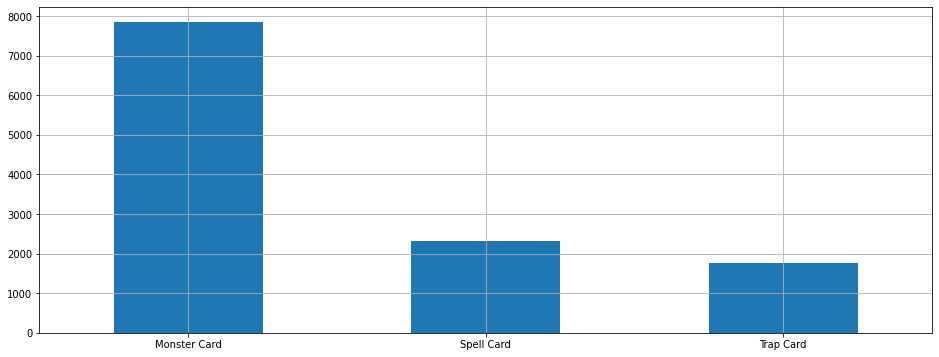

In [418]:
formatted_full_df['Card type'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=0)

### Monsters

#### Attributes

In [93]:
formatted_monster_df.groupby('Attribute').nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Attribute,,,,,,,,,,,,,,
DARK,2176,2143,1,0,8,6,23,14,70,63,6,39,7,7
DIVINE,6,0,1,0,1,0,2,2,3,3,0,0,2,2
EARTH,1843,1826,1,0,8,6,23,12,71,59,4,28,5,6
FIRE,647,643,1,0,8,6,22,12,43,40,4,20,3,6
LIGHT,1599,1565,1,0,8,6,23,14,58,50,5,30,7,6
WATER,814,806,1,0,8,6,22,11,56,41,4,16,6,7
WIND,755,746,1,0,7,6,23,12,47,39,4,14,6,6


<AxesSubplot:>

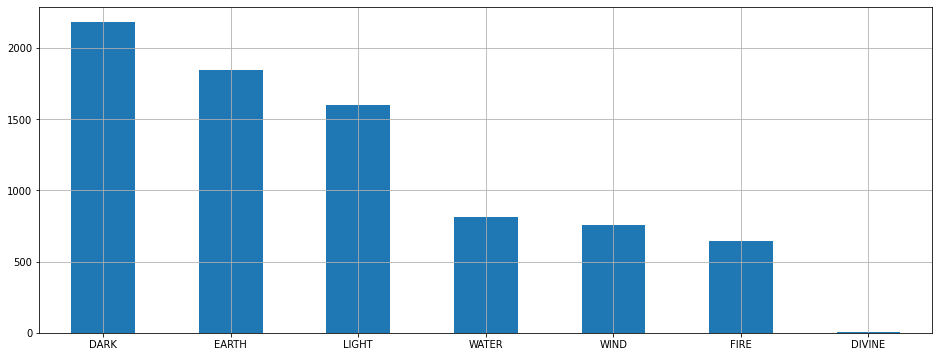

In [417]:
formatted_monster_df['Attribute'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=0)

#### Primary types

In [94]:
formatted_monster_df.groupby('Primary type').nunique()

,Name,Password,Card type,Property,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Primary type,,,,,,,,,,,,,,
Effect Monster,5519,5473,1,0,6,7,25,12,74,69,0,0,6,6
Fusion Monster,61,60,1,0,1,6,20,9,29,23,0,0,1,2
Link Monster,359,353,1,0,0,6,23,0,38,0,6,60,4,4
Monster Token,1,0,1,0,0,1,1,1,1,1,0,0,0,1
Normal Monster,743,700,1,0,1,6,23,10,59,49,0,0,4,4
Pendulum Monster,282,276,1,0,3,6,21,12,44,36,0,0,4,6
Ritual Monster,15,15,1,0,0,4,8,3,12,9,0,0,1,1
Synchro Monster,394,390,1,0,1,6,23,13,40,38,0,0,4,6
Xyz Monster,470,462,1,0,0,6,23,14,51,42,0,0,4,6


<AxesSubplot:>

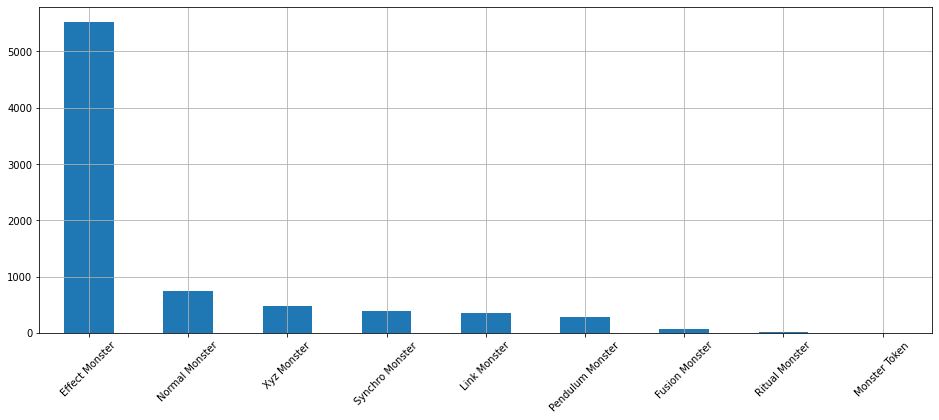

In [415]:
formatted_monster_df['Primary type'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=45)

#### Secondary types

In [95]:
formatted_monster_df.groupby('Secondary type').nunique()

,Name,Password,Card type,Property,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Secondary type,,,,,,,,,,,,,,
Flip monster,180,179,1,0,2,6,19,12,38,33,0,0,3,5
Gemini monster,45,45,1,0,1,6,18,8,17,19,0,0,1,1
Spirit monster,36,36,1,0,2,6,13,9,22,20,0,0,2,2
Toon monster,17,17,1,0,1,6,7,5,12,15,0,0,1,2
Tuner monster,457,453,1,0,5,6,23,9,32,32,0,0,3,5
Union monster,37,37,1,0,1,6,9,8,17,14,0,0,1,1


<AxesSubplot:>

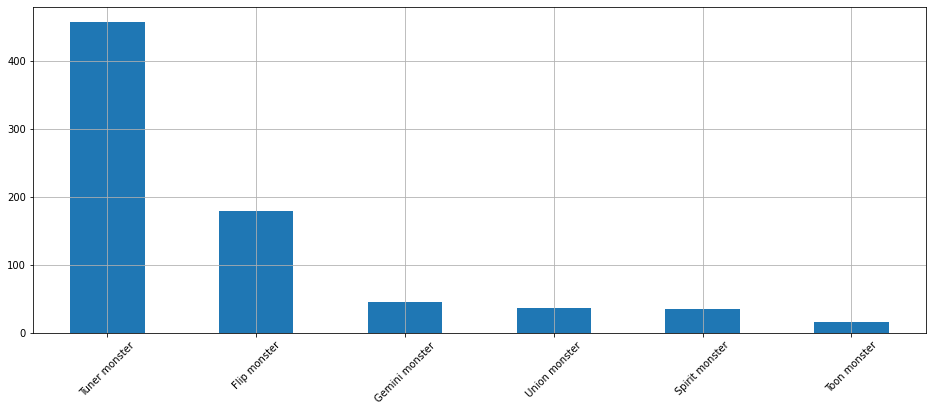

In [414]:
formatted_monster_df['Secondary type'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=45)

#### Monster types

In [391]:
formatted_monster_df.groupby('Monster type').nunique()

,Name,Password,Card type,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Monster type,,,,,,,,,,,,,
Aqua,255,251,1,8,6,6,10,50,33,2,3,3,5
Beast,372,365,1,8,4,6,10,48,38,2,7,4,5
Beast-Warrior,234,230,1,7,3,6,10,36,29,3,6,4,5
Creator God,1,0,1,1,0,1,1,1,1,0,0,0,1
Cyberse,243,242,1,6,1,6,10,30,29,6,37,3,4
Dinosaur,120,119,1,7,1,6,10,34,30,2,3,3,3
Divine-Beast,5,0,1,1,0,1,1,3,3,0,0,2,2
Dragon,647,639,1,7,6,6,13,52,48,5,19,6,7
Fairy,495,485,1,7,5,6,12,43,38,4,12,7,5


<AxesSubplot:>

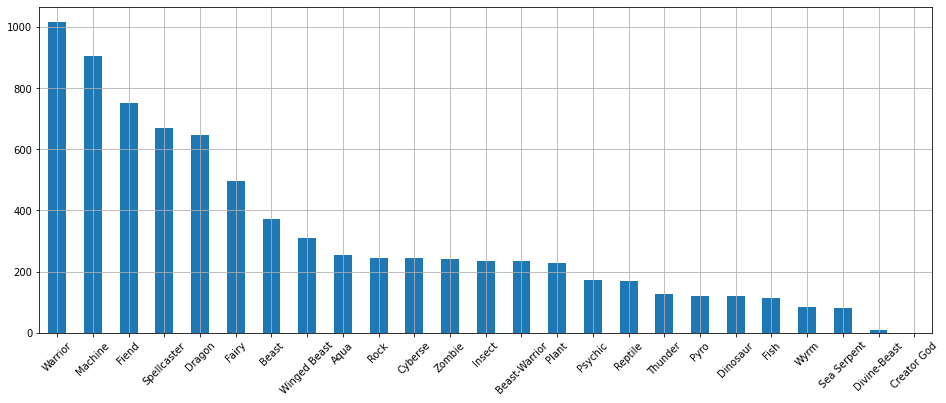

In [413]:
formatted_monster_df['Monster type'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=45)

#### ATK

In [393]:
formatted_monster_df.groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Card type,Primary type,Secondary type,Attribute,Monster type,Level/Rank,DEF,Link,Link Arrows,TCG status,OCG status
ATK,,,,,,,,,,,,,
0,599,574,1,8,5,6,23,13,35,5,15,6,7
50,2,2,1,1,0,2,2,1,2,0,0,1,1
100,214,213,1,6,3,6,20,11,27,2,2,2,3
150,1,1,1,1,0,1,1,1,1,0,0,1,1
200,114,114,1,6,5,6,20,7,21,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,2,2,1,1,0,2,1,1,1,0,0,1,1
5000,9,9,1,4,0,3,4,2,4,1,1,1,1
?,82,74,1,6,1,7,19,15,8,1,1,4,4


<AxesSubplot:>

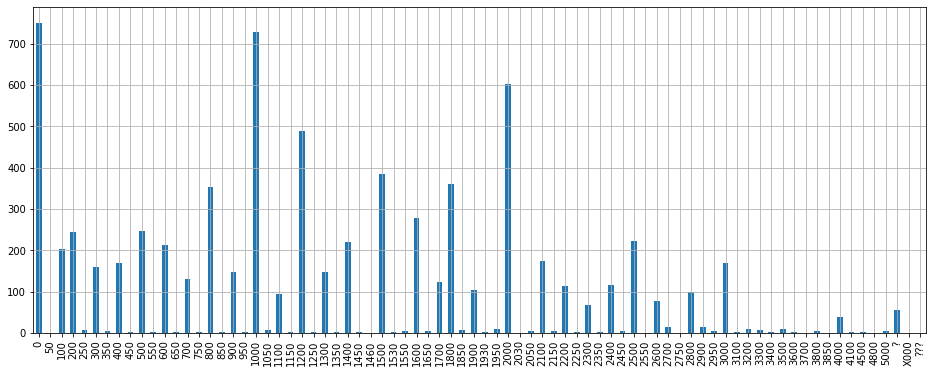

In [394]:
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (16,6), grid = True)

#### DEF

In [392]:
formatted_monster_df.groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Card type,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,Link,Link Arrows,TCG status,OCG status
DEF,,,,,,,,,,,,,
0,751,722,1,6,6,6,23,14,45,0,0,5,6
50,1,1,1,1,0,1,1,1,1,0,0,1,1
100,204,203,1,5,4,6,19,10,24,0,0,3,3
200,245,244,1,5,5,6,23,10,31,0,0,3,3
250,8,8,1,2,1,4,5,2,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,1,1,1,1,0,1,1,1,1,0,0,1,1
5000,5,5,1,1,0,3,3,2,2,0,0,1,1
?,56,49,1,5,1,7,17,14,2,0,0,4,4


<AxesSubplot:>

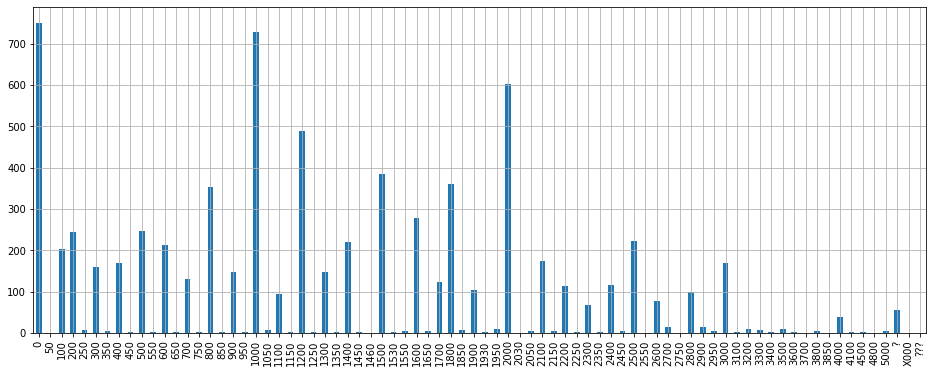

In [412]:
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (16,6), grid = True)

#### Level/Rank

In [396]:
formatted_monster_df.groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Card type,Primary type,Secondary type,Attribute,Monster type,ATK,DEF,Link,Link Arrows,TCG status,OCG status
Level/Rank,,,,,,,,,,,,,
0,6,6,1,2,0,2,2,3,3,0,0,2,2
1,621,596,1,6,5,6,23,22,29,0,0,4,5
2,658,648,1,6,5,6,23,30,30,0,0,5,6
3,1135,1129,1,6,5,6,23,41,36,0,0,4,7
4,2310,2298,1,6,6,6,23,54,47,0,0,5,7
5,589,587,1,6,6,6,23,46,38,0,0,4,4
6,591,586,1,7,6,6,23,38,38,0,0,6,6
7,459,450,1,7,6,6,23,36,35,0,0,5,6
8,654,637,1,7,5,6,23,42,41,0,0,5,5


<AxesSubplot:>

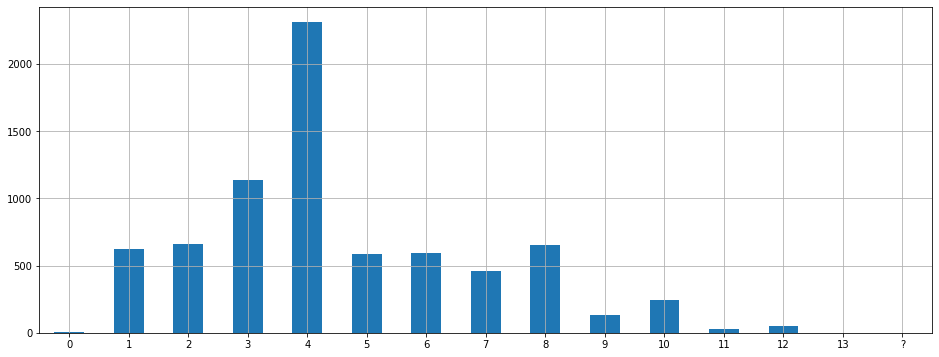

In [409]:
formatted_monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (16,6), grid = True, rot=0)

#### Link

In [397]:
formatted_monster_df.groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Card type,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link Arrows,TCG status,OCG status
Link,,,,,,,,,,,,,
1,47,47,1,1,0,6,11,0,10,0,8,3,3
2,179,179,1,1,0,6,23,0,23,0,18,3,3
3,81,81,1,1,0,6,16,0,17,0,17,2,2
4,43,40,1,1,0,6,15,0,12,0,13,3,4
5,8,5,1,1,0,2,5,0,4,0,3,2,2
6,1,1,1,1,0,1,1,0,1,0,1,1,1


<AxesSubplot:>

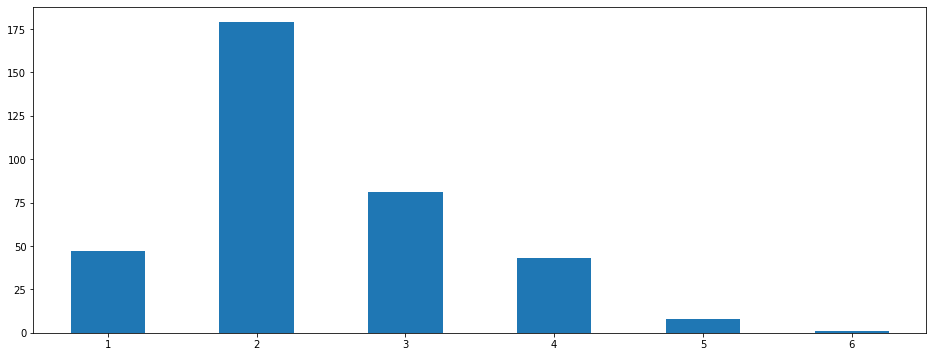

In [408]:
formatted_monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (16,6), rot=0)

#### Link Arrows

In [119]:
formatted_monster_df.groupby('Link Arrows').nunique()

,Name,Password,Card type,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,TCG status,OCG status
Link Arrows,,,,,,,,,,,,,
"(Bottom-Center,)",18,18,1,1,0,5,7,0,9,0,1,2,3
"(Bottom-Center, Bottom-Left)",6,6,1,1,0,3,5,0,5,0,1,1,1
"(Bottom-Center, Bottom-Left, Bottom-Right)",21,21,1,1,0,6,12,0,9,0,1,2,1
"(Bottom-Center, Bottom-Left, Bottom-Right, Middle-Left, Middle-Right)",4,1,1,1,0,2,3,0,3,0,1,2,2
"(Bottom-Center, Bottom-Left, Bottom-Right, Middle-Left, Middle-Right, Top-Center)",1,1,1,1,0,1,1,0,1,0,1,1,1
"(Bottom-Center, Bottom-Left, Bottom-Right, Middle-Right)",1,1,1,1,0,1,1,0,1,0,1,1,1
"(Bottom-Center, Bottom-Left, Bottom-Right, Top-Center)",8,8,1,1,0,3,7,0,4,0,1,1,2
"(Bottom-Center, Bottom-Left, Middle-Left, Middle-Right)",1,1,1,1,0,1,1,0,1,0,1,1,1
"(Bottom-Center, Bottom-Left, Middle-Left, Top-Center)",1,1,1,1,0,1,1,0,1,0,1,1,1


<AxesSubplot:>

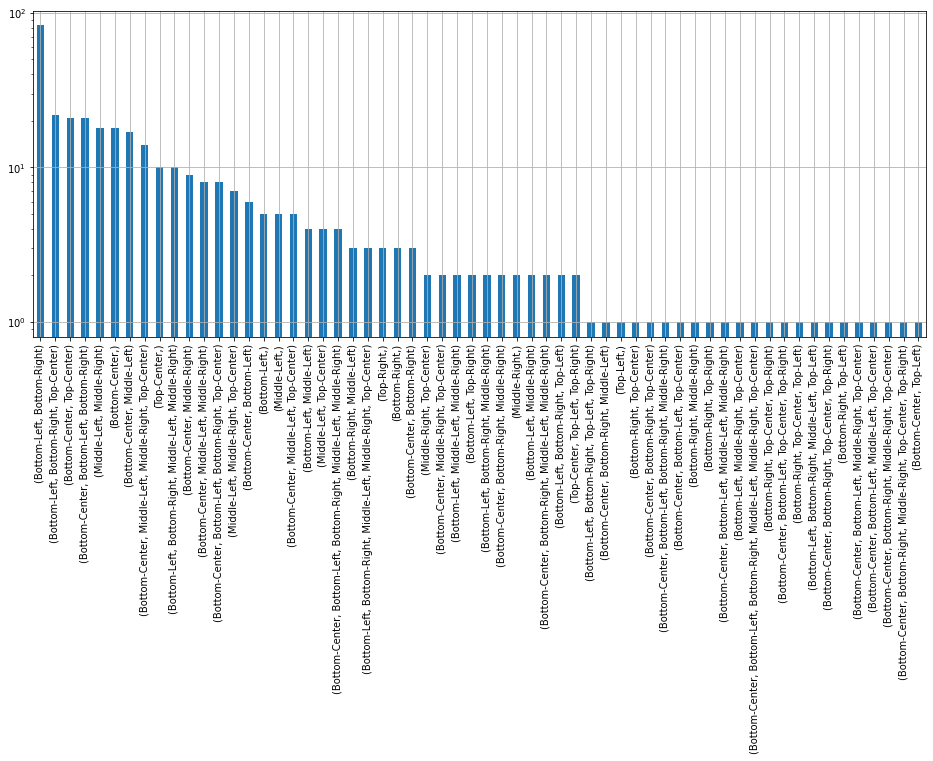

In [406]:
formatted_monster_df['Link Arrows'].value_counts().plot.bar(figsize = (16,6), logy=True, grid = True)

### Spell & Trap

#### Properties

In [118]:
formatted_st_df.groupby('Property').nunique()

,Name,Password,Card type,TCG status,OCG status
Property,,,,,
Continuous Spell Card,404,400,1,5,5
Continuous Trap Card,484,474,1,4,4
Counter Trap Card,153,149,1,2,3
Equip Spell Card,256,256,1,2,2
Field Spell Card,265,260,1,5,5
Normal Spell Card,902,897,1,4,6
Normal Trap Card,1139,1134,1,4,6
Quick-Play Spell Card,410,402,1,3,5
Ritual Spell Card,72,72,1,1,1


<AxesSubplot:>

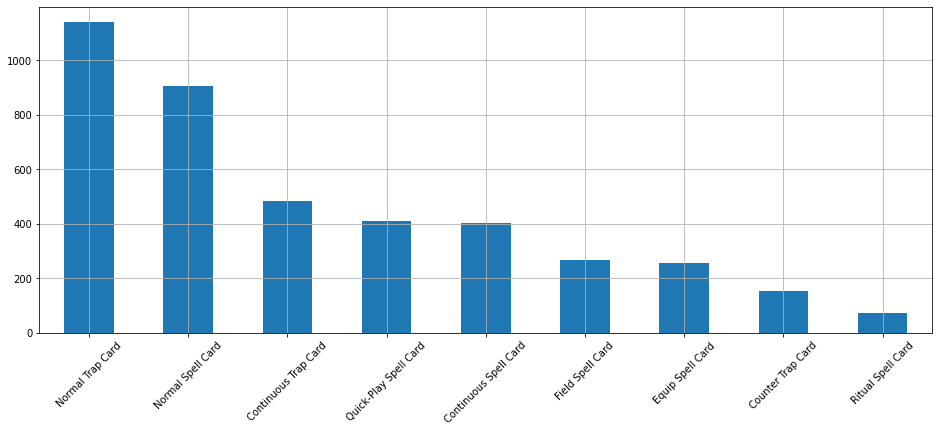

In [404]:
formatted_st_df['Property'].value_counts().plot.bar(figsize = (16,6), grid = True, rot=45)

### TCG & OCG status

#### TGC status

In [103]:
formatted_full_df.groupby('TCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,OCG status
TCG status,,,,,,,,,,,,,,
Forbidden,99,99,3,7,5,2,6,19,12,27,21,4,10,4
Illegal,38,0,3,3,6,0,6,14,5,11,12,2,2,1
Legal,20,0,1,0,1,0,5,11,5,6,7,0,0,1
Limited,81,81,3,7,6,3,6,15,9,20,20,2,2,4
Not yet released,7,6,1,0,1,0,3,5,7,7,6,0,0,2
Semi-Limited,9,9,3,4,1,0,3,3,1,3,3,0,0,3
Unlimited,11165,11162,3,9,8,6,7,24,14,80,75,6,59,4
NaN,514,419,3,9,8,2,7,23,12,53,37,5,8,4


<AxesSubplot:>

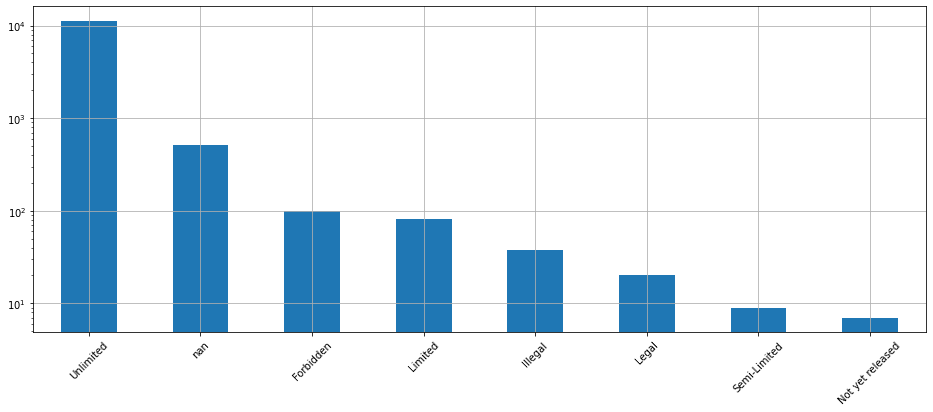

In [403]:
formatted_full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (16,6), logy=True, grid = True, rot=45)

#### OCG status

In [104]:
formatted_full_df.groupby('OCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status
OCG status,,,,,,,,,,,,,,
Forbidden,87,87,3,7,5,4,6,19,11,28,21,4,7,3
Illegal,32,1,3,2,7,1,6,12,8,14,15,2,2,1
Legal,38,0,1,0,2,0,6,17,7,8,8,0,0,1
Limited,66,66,3,7,6,2,6,13,9,18,17,3,5,4
Not yet released,47,0,3,7,4,1,6,12,10,19,18,0,0,1
Semi-Limited,28,28,3,5,4,2,3,9,4,9,7,0,0,4
Unlimited,11569,11541,3,9,8,6,7,25,14,81,76,6,59,5
NaN,62,50,3,8,5,1,6,17,10,22,22,3,4,2


<AxesSubplot:>

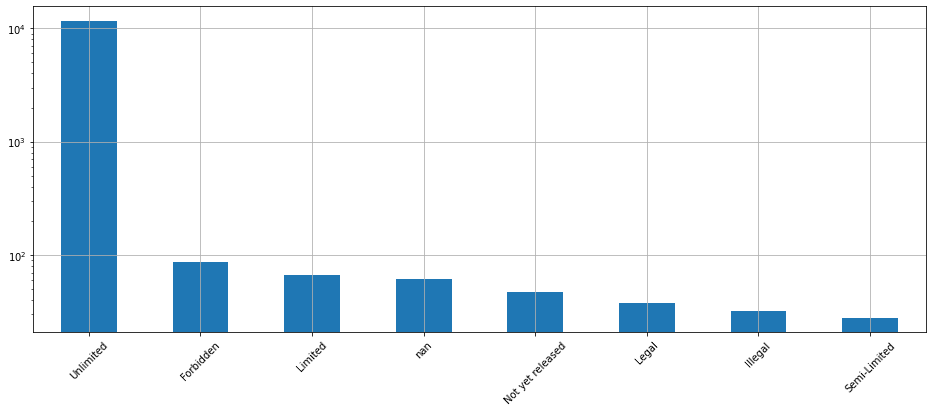

In [400]:
formatted_full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (16,6), logy=True, grid = True, rot=45)

#### TCG vs. OCG status

In [162]:
pd.crosstab(formatted_full_df['OCG status'],formatted_full_df['TCG status'], dropna=False, margins = True)

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,Unlimited,All
OCG status,,,,,,,,
Forbidden,72,0,0,5,0,0,10,87
Illegal,0,26,0,0,0,0,0,32
Legal,0,0,20,0,0,0,0,38
Limited,6,0,0,35,0,3,22,66
Not yet released,0,0,0,0,1,0,0,47
Semi-Limited,3,0,0,5,0,3,17,28
Unlimited,18,0,0,36,6,3,11068,11575
All,99,38,20,81,7,9,11167,11935


<AxesSubplot:xlabel='TCG status', ylabel='OCG status'>

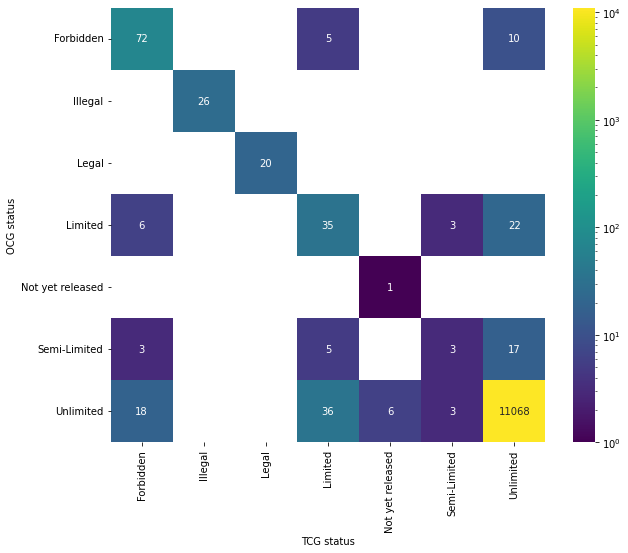

In [402]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.crosstab(formatted_full_df['OCG status'],formatted_full_df['TCG status'], dropna=False), annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())

## Searches

In [388]:
formatted_full_df.loc[formatted_full_df['OCG status'] == 'Not yet released'].loc[formatted_full_df['TCG status'] == 'Not yet released']

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
5240,Rainbow Dragon Overdrive,NaN,Monster Card,NaN,Effect Monster,NaN,LIGHT,Dragon,12,4000,0,NaN,NaN,Not yet released,Not yet released


In [399]:
formatted_full_df.loc[formatted_full_df['Level/Rank']=='?']

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
6236,Dark Soul Token,NaN,Monster Card,NaN,Normal Monster,NaN,DARK,Zombie,?,?,0,NaN,NaN,NaN,Legal


In [420]:
formatted_full_df.loc[formatted_full_df['Primary type']=='Monster Token']

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
10909,Laval Token,NaN,Monster Card,NaN,Monster Token,NaN,FIRE,Pyro,1,0,0,NaN,NaN,NaN,Legal


In [422]:
formatted_full_df.loc[formatted_full_df['Name'].str.contains('Token')]

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Link,Link Arrows,TCG status,OCG status
2049,Token Sundae,52971673,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
2050,Token Thanksgiving,57182235,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
3398,Oh Tokenbaum!,97173708,Trap Card,Normal Trap Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
3883,Token Feastevil,83675475,Trap Card,Normal Trap Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
3884,Token Stampede,14342283,Trap Card,Continuous Trap Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unlimited,Unlimited
4485,Dragon Lord Token,NaN,Monster Card,NaN,Normal Monster,NaN,LIGHT,Dragon,1,0,0,NaN,NaN,Legal,Legal
4504,Dual Avatar Spirit Token,NaN,Monster Card,NaN,Normal Monster,NaN,LIGHT,Warrior,2,0,0,NaN,NaN,Legal,Legal
4553,Emissary of Darkness Token,NaN,Monster Card,NaN,Normal Monster,NaN,LIGHT,Fairy,7,?,?,NaN,NaN,NaN,Legal
4634,Gadget Token,NaN,Monster Card,NaN,Normal Monster,NaN,LIGHT,Cyberse,2,0,0,NaN,NaN,NaN,Legal
4661,Generaider Token,NaN,Monster Card,NaN,Normal Monster,NaN,LIGHT,Fairy,4,1500,1500,NaN,NaN,Legal,Legal
